# Where are these conspiracies coming from? Plotting user locations of conspiracy and anti-vaccine related tweets 

Any and all feedback is welcome and appreciated

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('../input/pfizer-vaccine-tweets/vaccination_tweets.csv')

# Filter tweets that are related to anti-vaccine sentiment or vaccine conspiracies

In [ ]:
tweets = []
for t in data.text:
        t_lower = t.lower()
        tweets.append(t_lower)
data["tweets"] = tweets

The list of conspiracy and anti-vaccine related words and hashtaags is in no way empiricaly generated. A future goal is to generate a proper list of terms. However, this is a rather exhaustive list given the size of the dataset

In [ ]:
conspiracy_words = ["plandemic", "condemic", "autism", "sheep", "gates", "deaths", "billgatesisnotadoctor", "pcrgate", 'wakeupamerica', 'scamdemic', 'idonotconsent', 'microchip', 'nomasks', '5g', 'soros', 'hoax', 'vaccineskill', 'knowtherisk', 'forcedinjections', 'medicalfreedom', 'believemothers', 'vaccinsanity', 'pharma', "bigpharma", 'biologicallyengineeredhumans', 'antivaxx', 'bewaretheneedle', 'alternativemedicine', 'standup', 'pharmaceuticalskill', 'vaccineinjury', 'pharmthesheep', 'vaccineeducation', 'money', 'syringeslaughter', 'bhfyp', 'truthhurts', 'vaccineawarness', 'antivaccination', 'teamnovaxx', 'antivacc', 'vaccinetruth', 'vaccineinjuryawareness', 'dotheresearch', 'vaccinesharm', 'populationcontrol']

In [ ]:
conspiracies = []
for word in conspiracy_words:
    frame = data[data["tweets"].str.contains(word, case=False, na=False)]
    conspiracies.append(frame)

In [ ]:
conspiracy_tweets = pd.concat(conspiracies).drop_duplicates()
conspiracy_tweets

# Plotting user locations for all tweets

In [ ]:
import geopy


In [ ]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_application")

In [ ]:
longitude_whole = []
latitude_whole = []
magnitude_whole = []
from tqdm import tqdm_notebook as tqdm
tqdm().pandas()
for place in tqdm(data.user_location):
    try:
        lo = float(geolocator.geocode(place).longitude)
        longitude_whole.append(lo)
        la = float(geolocator.geocode(place).latitude)
        latitude_whole.append(la)
    except:
        pass

In [ ]:
locations_whole = pd.DataFrame({"latitude": latitude_whole, "longitude": longitude_whole})

In [ ]:
!pip install gmaps
import gmaps
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("API_KEY")
gmaps.configure(api_key=secret_value_0)

In [ ]:
%matplotlib inline
fig1 = gmaps.figure()
heatmaplayer = gmaps.heatmap_layer(locations_whole, weights=None)
heatmaplayer.point_radius = 5
heatmaplayer.max_intensity = 3
fig1.add_layer(heatmaplayer)
fig1

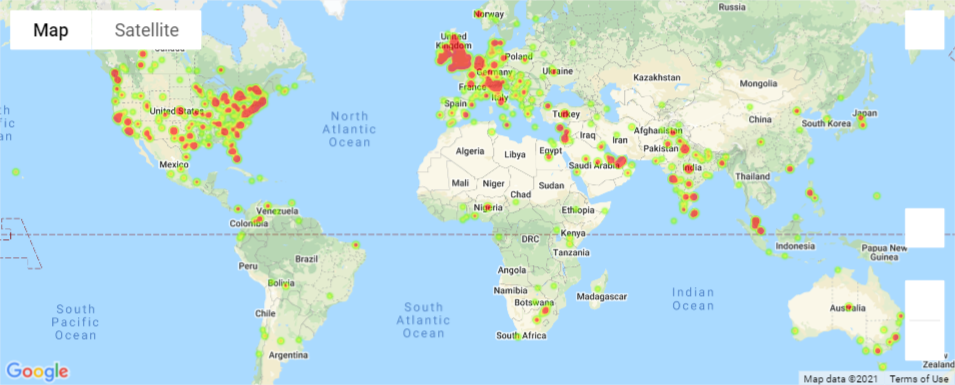

Note: Figures are uploaded as images as they will not render in kaggle notebook, but should render for you if you try running the code

# Plotting user locations for anti-vaccine tweets

In [ ]:
longitude = []
latitude = []
magnitude = []
for place_2 in conspiracy_tweets.user_location:
    try:
        lo_2 = float(geolocator.geocode(place_2).longitude)
        longitude.append(lo_2)
        la_2 = float(geolocator.geocode(place_2).latitude)
        latitude.append(la_2)
    except:
        pass

In [ ]:
locations = pd.DataFrame({"latitude": latitude, "longitude": longitude})

In [ ]:
%matplotlib inline
locations = locations
weights = None
fig2 = gmaps.figure()
heatmaplayer_c = gmaps.heatmap_layer(locations, weights=None)
heatmaplayer_c.point_radius = 5
heatmaplayer_c.max_intensity = 3
fig2.add_layer(heatmaplayer_c)
fig2

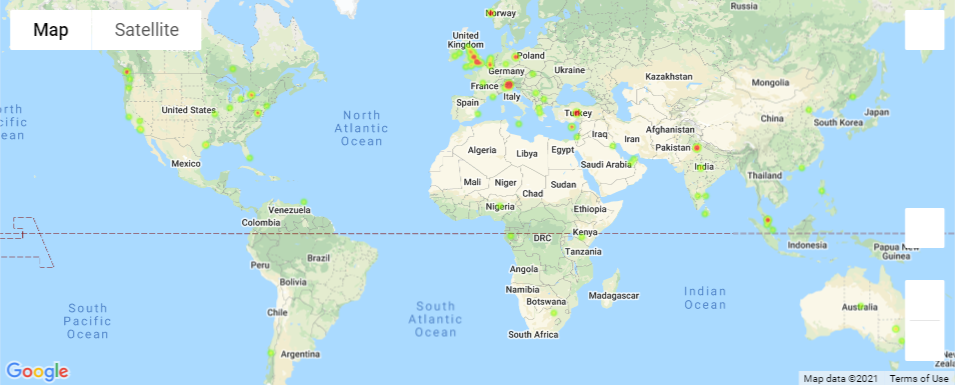

# Next Steps
* Empiricaly generating list of conspiracy and anti-vaccine related words, and filtering out tweets that use these hashtags to ridicule them and do not actually express anti-vaccine sentiment
* Gathering more tweets to better understand patterns and trends surrounding dissemination of vaccine misinformation